In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

dataset = fetch_ucirepo(id=891)
X = dataset.data.features
y = dataset.data.targets
df = pd.concat([X, y], axis=1)

# metadata
print(dataset.metadata)

# variable information
print(dataset.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [ ]:
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.139333
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.346294
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


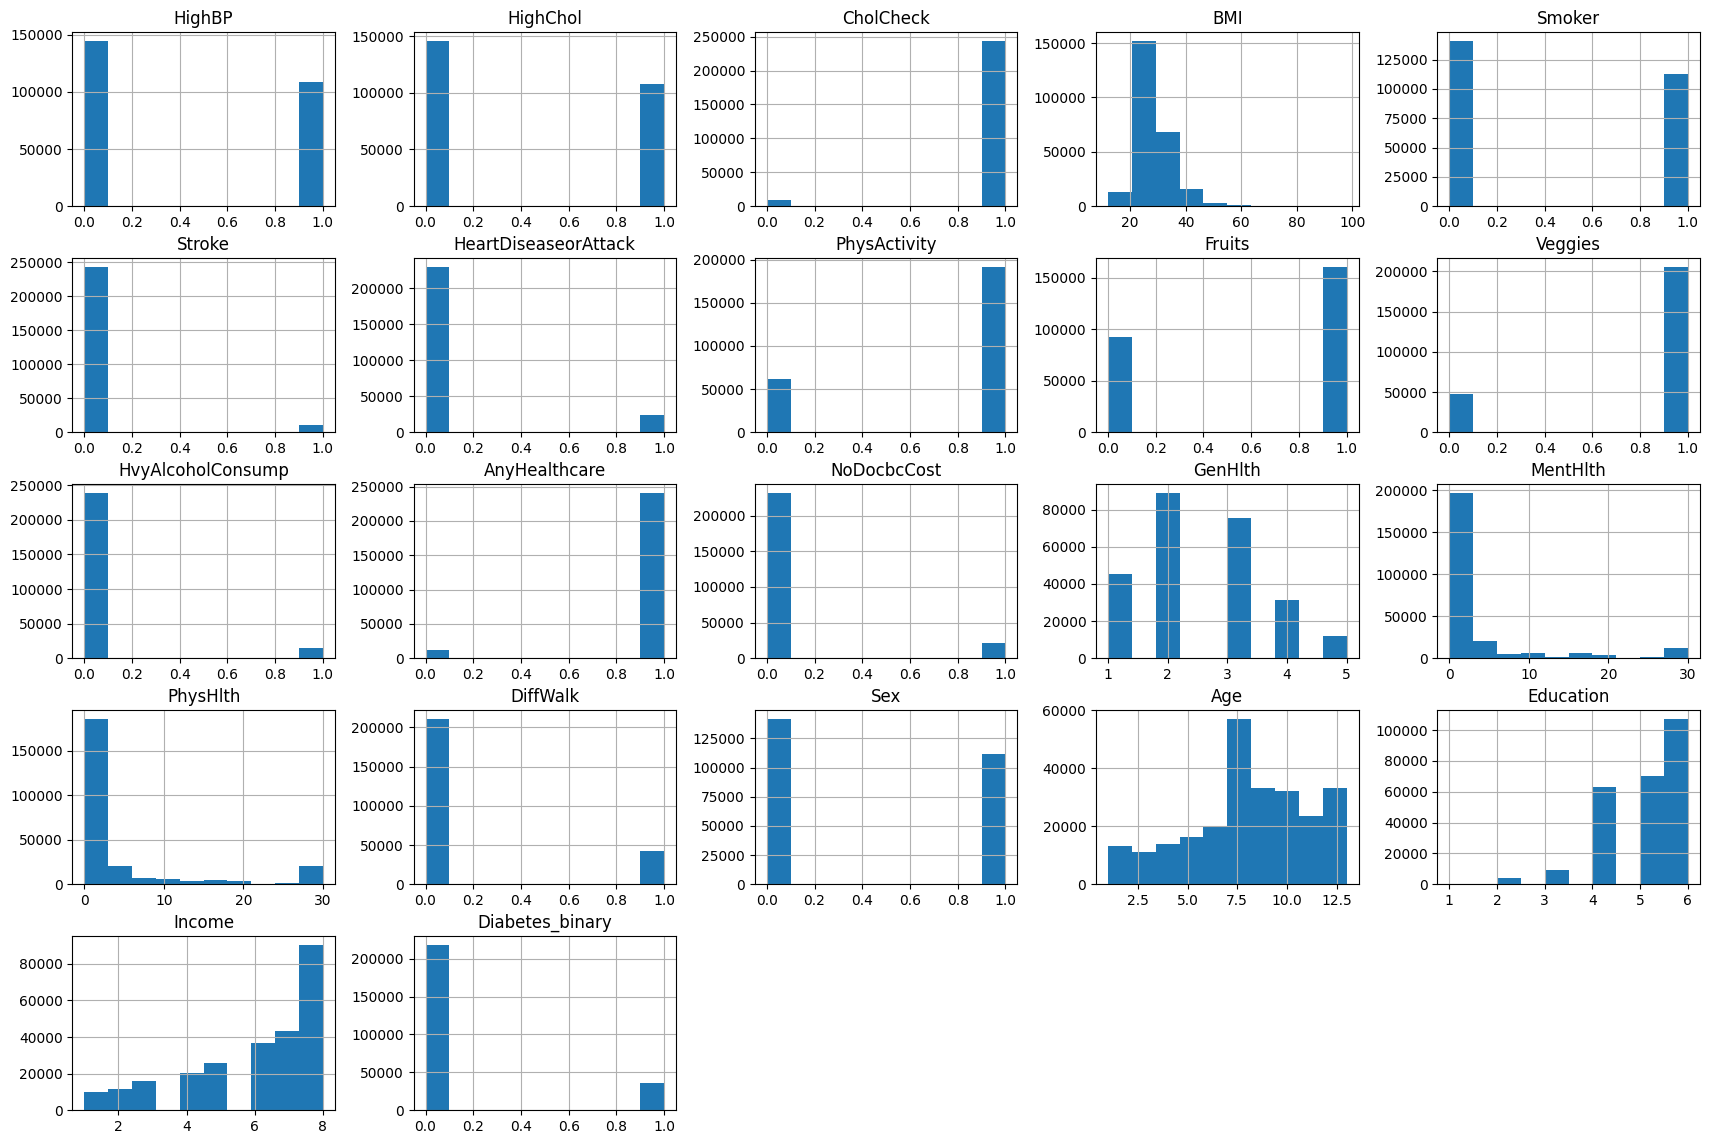

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(21, 14))
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

goodFeatures = SelectKBest(score_func=chi2, k=10)
fit = goodFeatures.fit(X,y)

df_scores = pd.DataFrame(fit.scores_, columns=["Score"])
df_columns = pd.DataFrame(X.columns, columns=["Features"])

Chi_Scores = pd.concat([df_columns,df_scores],axis=1)

Chi_Scores

,Features,Score
0,HighBP,10029.013935
1,HighChol,5859.710582
2,CholCheck,39.716825
3,BMI,18355.166400
4,Smoker,521.978858
5,Stroke,2725.225194
6,HeartDiseaseorAttack,7221.975378
7,PhysActivity,861.887532
8,Fruits,154.291404
9,Veggies,153.169215


In [ ]:
print(Chi_Scores.nlargest(11,'Score'))

                Features          Score
15              PhysHlth  133424.406534
14              MentHlth   21029.632228
3                    BMI   18355.166400
16              DiffWalk   10059.506391
0                 HighBP   10029.013935
13               GenHlth    9938.507776
18                   Age    9276.141199
6   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
20                Income    4829.816361
5                 Stroke    2725.225194


These are the selected features, except the "Income" will not be used as it might be bias